In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def read_data(filename):
    r=[]
    q=[]
    mu=[]
    phi=[]
    dphi=[]
    IR = []
    datafile=open(filename,'r')
    lines = datafile.readlines()[2:-2]
    for line in lines:
        (a,b,c,d,e,f)=line.split()
        r.append(float(a))
        q.append(float(b))
        mu.append(float(c))
        phi.append(float(d))
        dphi.append(float(e))
        IR.append(float(f))
    datafile.close()
    return np.array(r),np.array(q),np.array(mu),np.array(phi),np.array(dphi),np.array(IR)

In [3]:
# arrays to store the star data
num_files = 12;
N = 64 #number of intervals inside the star for the coarsest grid
vec_length=(N+1)*2-3
r=np.zeros((num_files,vec_length)) # radius
q=np.zeros((num_files,vec_length)) # regularized pressure defined as dq = dp/(rho(p)+p)
mu=np.zeros((num_files,vec_length)) # mass parameter
phi=np.zeros((num_files,vec_length)) # scalar field
dphi=np.zeros((num_files,vec_length)) # derivative of the scalar field
IR=np.zeros((num_files,vec_length)) # independent residual based on the mu' equation

colors =['b:', 'g:', 'r:', 'c:', 'm:', 'y:', 'k:', 'b-.', 'g', 'r-.', 'c', 'm-.', 'y', 'k-.']
plot_begin = 0
plot_end = num_files-1
index_vec = range(plot_begin, plot_end)

This is a case with a well scalarized star with beta=3 mass_st=0.3 (alpha=0 always, 
unlike R-M at all). 

I use a tolerance of 1e-15 in relaxation, and the infinity norm, i.e the most stringent
conditions are imposed. I also ran 3 extra iterations of the Newton root finding even
after I reach the desired tolerance just in case. Overall, I play it as safe as possible.

We compare succesively finer grids to estimate truncation error for N=M=64 to N=M=131073. 
The difference of the solutions between successive grids should decrease by a factor of 4
since we use 2nd order convergent stencils. The plots are a bit crowded, ff you want to
investigate specific step sizes, you can modify index_vec above to pick which grids to
modify.

We see a trend of convergence, but it is not the constant factor of 4 we expect. At the
lowest step sizes (blue dotted to green dotted) convergence is better, the factor is 8
instead of 4, and truncation error changes sign. And then at the next halving of step
size (green dotted to red dotted), there is no convergence and the sign of the truncation
error flips again (more on the flipping at the end). Something similar happens when we go
to much finer grids, there seems to be no convergence at the highest resolution runs, i.e.
from the solid green to the solid blue line. But overall, there is a satisfactory convergence
trend.

Sign change in truncation error might not be unusual in relaxation, we want the absolute
values of errors to get smaller. When solving IVPs, the sign is typically the same for all
truncation errors since it corresponds to some higher derivative of the function we are 
trying to calculate numerically (that is why Richardson extrapolation works, for example).
I think this does not have to be the case for relaxation. So, for easier investigation, we
might plot the absolute values, but i left them as they are to see the sign changes, in case
it is indicative of something.

Why the weird convergence, or lack thereof at certain N=M values? Don't know, i am satisfied
with the general trend for now.

I also look at an independent residual based on a vertex-centered formula for mu'. It converges
as expected.

(1e-08, 0.001)

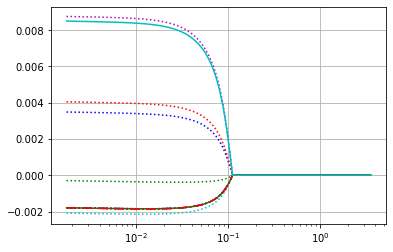

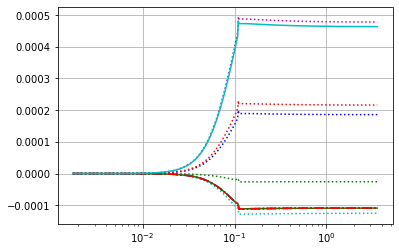

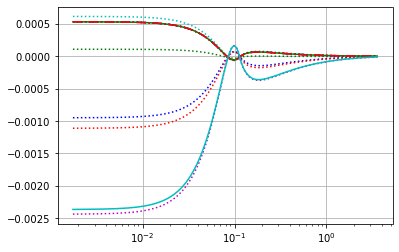

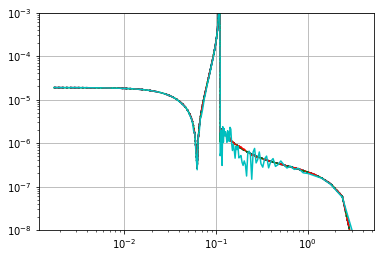

In [17]:
for i in range(num_files):
    r[i,:],q[i,:],mu[i,:],phi[i,:],dphi[i,:],IR[i,:] = read_data(
        f'relaxed_star_N{N*2**i+1}_rho1.502e+01_phi2.760e-01.txt')
plt.figure()
for i in index_vec:
    plt.semilogx(r[0,:],(q[i,:]-q[i+1,:])*4**i,colors[i])
plt.grid()

plt.figure()
for i in index_vec:
    plt.semilogx(r[0,:],(mu[i,:]-mu[i+1,:])*4**i,colors[i])
plt.grid()

plt.figure()
for i in index_vec:
    plt.semilogx(r[0,:],(phi[i,:]-phi[i+1,:])*4**i,colors[i])
plt.grid()

plt.figure()
for i in index_vec:
    plt.loglog(r[0,:],np.abs(IR[i+1,:]*4**i),colors[i])
plt.grid()
plt.ylim([1e-8,1e-3])

The following is a case with the same beta and mass_st, but slight scalarization.
Again, there is an overall convergence trend, but not with a constant factor of 4,
just like before.

(1e-08, 0.001)

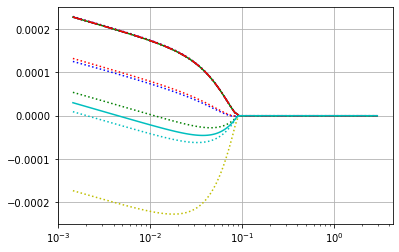

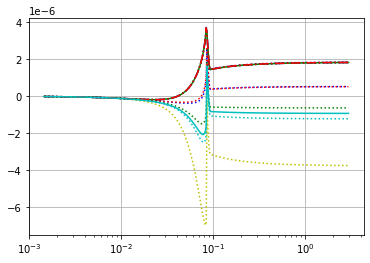

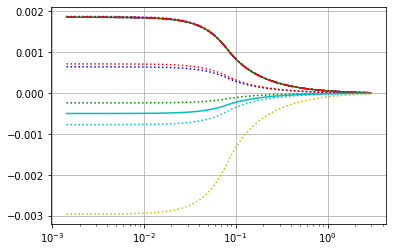

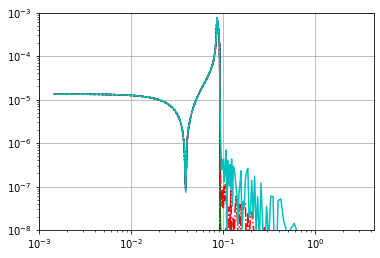

In [16]:
for i in range(num_files):
    r[i,:],q[i,:],mu[i,:],phi[i,:],dphi[i,:],IR[i,:]= read_data(
        f'relaxed_star_N{N*2**i+1}_rho7.682e+00_phi1.031e-02.txt')
    
plt.figure()
for i in index_vec:
    plt.semilogx(r[0,:],(q[i,:]-q[i+1,:])*4**i,colors[i])
plt.grid()

plt.figure()
for i in index_vec:
    plt.semilogx(r[0,:],(mu[i,:]-mu[i+1,:])*4**i,colors[i])
plt.grid()

plt.figure()
for i in index_vec:
    plt.semilogx(r[0,:],(phi[i,:]-phi[i+1,:])*4**i,colors[i])
plt.grid()

plt.figure()
for i in index_vec:
    plt.loglog(r[0,:],np.abs(IR[i+1,:]*4**i),colors[i])
plt.grid()
plt.ylim([1e-8,1e-3])

And this one is an unscalarized (GR) star. I had an error before and thought convergence
was lost, but now the error is corrected (thanks andrew). It is uneven, but the general
2nd order convergence trend is there.

(1e-08, 0.001)

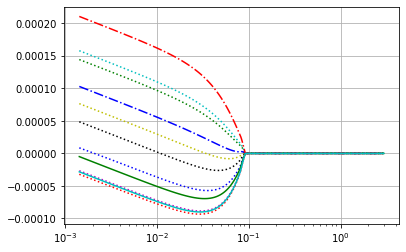

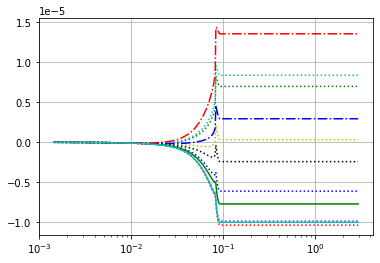

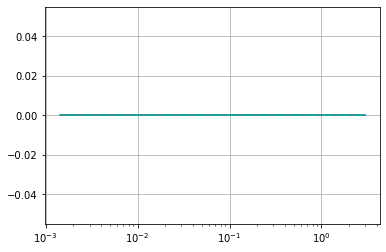

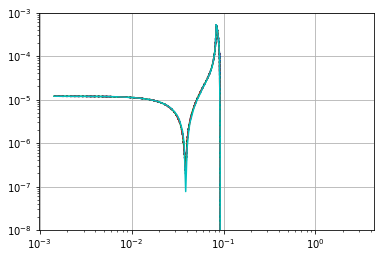

In [18]:
for i in range(num_files):
    r[i,:],q[i,:],mu[i,:],phi[i,:],dphi[i,:],IR[i,:] = read_data(
        f'relaxed_star_N{N*2**i+1}_rho7.002e+00_phi0.000e+00.txt')

plt.figure()
for i in index_vec:
    plt.semilogx(r[0,:],(q[i,:]-q[i+1,:])*4**i,colors[i])
plt.grid()

# plt.figure()
# for i in index_vec:
#     plt.loglog(r[0,:],np.abs(q[i,:]-q[i+1,:])*4**i,colors[i])
# plt.grid()
# #plt.ylim(1e-8,1e-4)

plt.figure()
for i in index_vec:
    plt.semilogx(r[0,:],(mu[i,:]-mu[i+1,:])*4**i,colors[i])
plt.grid()

# plt.figure()
# for i in index_vec:
#     plt.loglog(r[0,:],(mu[i,:]-mu[i+1,:])*4**i,colors[i])
# plt.grid()

plt.figure()
for i in index_vec:
    plt.semilogx(r[0,:],(phi[i,:]-phi[i+1,:])*4**i,colors[i])
plt.grid()

plt.figure()
for i in index_vec:
    plt.loglog(r[0,:],np.abs(IR[i+1,:]*4**i),colors[i])
plt.grid()
plt.ylim([1e-8,1e-3])